# Loan Eligibility Prediction

In [1]:
#importing relevant libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,f1_score, classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-eligible-dataset/loan-train.csv
/kaggle/input/loan-eligible-dataset/loan-test.csv


**Loading data**

In [2]:
train_loan_df = pd.read_csv('../input/loan-eligible-dataset/loan-train.csv')
test_loan_df = pd.read_csv('../input/loan-eligible-dataset/loan-test.csv')

In [3]:
train_loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print('Rows: {0} \nColumns: {1}'.format(train_loan_df.shape[0],train_loan_df.shape[1]))

Rows: 614 
Columns: 13


In [5]:
#Understanding data
train_loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train_loan_df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

**Dropping Loan_Id as it does not hold any significance**

In [8]:
df = train_loan_df.drop('Loan_ID', axis = 1)
test_df = test_loan_df.drop('Loan_ID', axis = 1)

In [9]:
df.Loan_Status.describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

**Mapping 'Y' as 1 and 'N'as 0**

In [10]:
df.Loan_Status = df.Loan_Status.map({'Y':1, 'N':0})


**Changing Credit History's data type as object**
As there are only two values '0' and '1'

In [11]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [12]:
df['Credit_History'].loc[df.Credit_History == 1.0] = 'one'
df['Credit_History'].loc[df.Credit_History == 0.0] = 'zero'

test_df['Credit_History'].loc[test_df.Credit_History == 1.0] = 'one'
test_df['Credit_History'].loc[test_df.Credit_History == 0.0] = 'zero'

# Univariate Analysis

In [13]:
cat_cols = df.select_dtypes('object').columns 
num_cols = df.select_dtypes(['int64', 'float64']).columns

In [14]:
print(cat_cols)
print(num_cols)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status'],
      dtype='object')


**Count plots for categorical columns and histograms for numerical  columns**

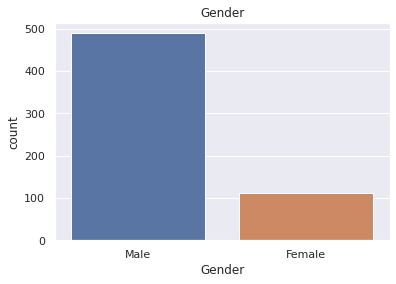

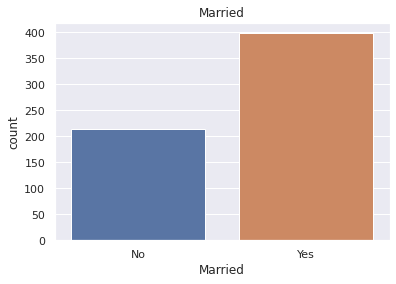

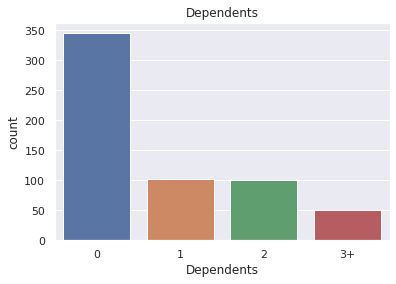

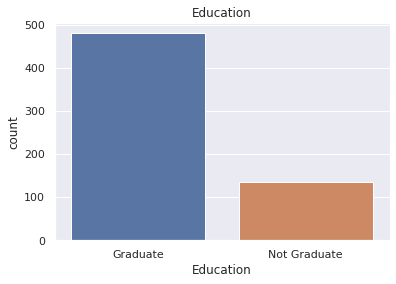

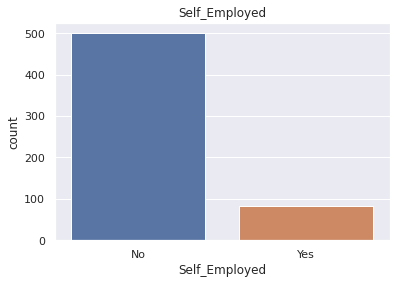

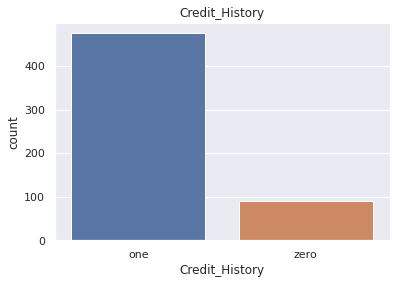

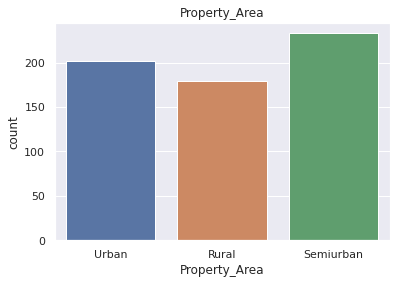

In [15]:
for col in cat_cols:
    sns.countplot(df[col])
    plt.title(col)
    plt.show()
    print('\n\n')

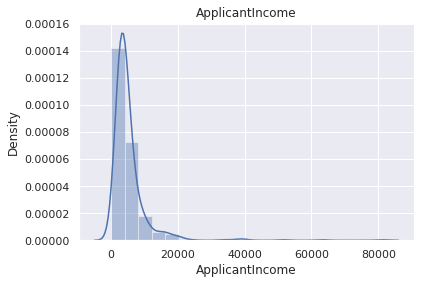

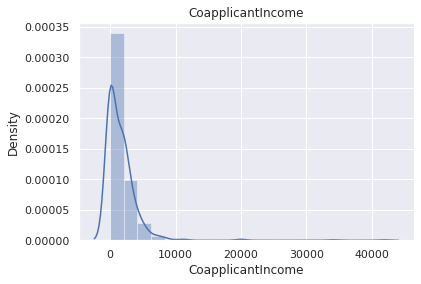

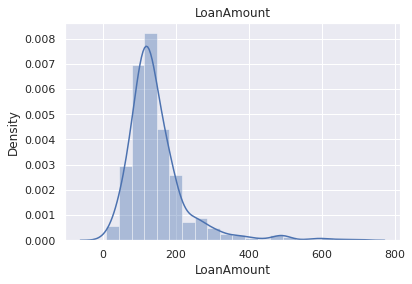

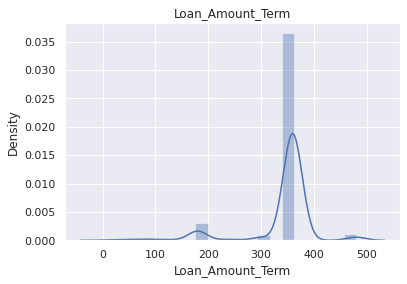

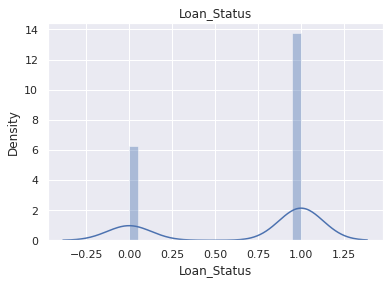

In [16]:
for col in num_cols:
    sns.distplot(df[col], bins = 20)
    plt.title(col)
    plt.show()
    print('\n\n')

# Bivariate Analysis

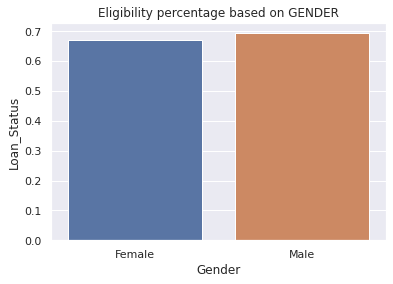

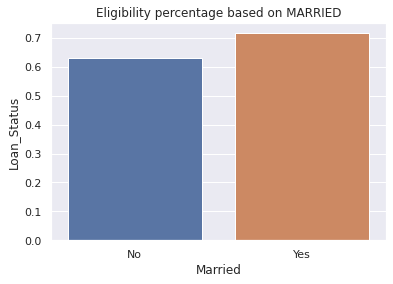

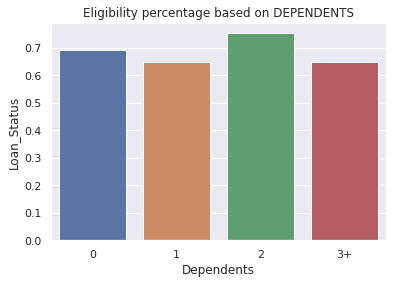

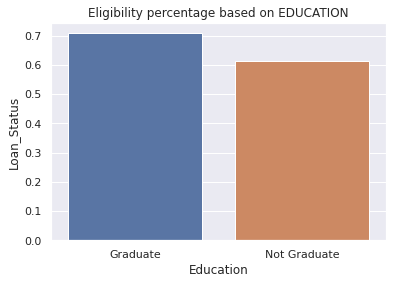

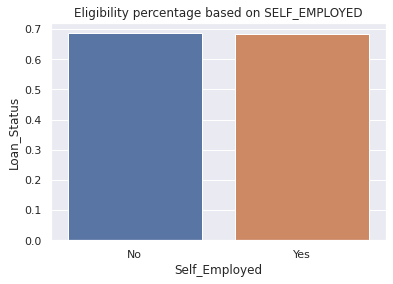

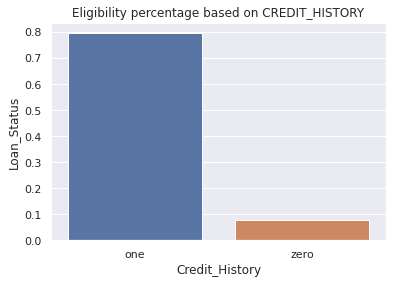

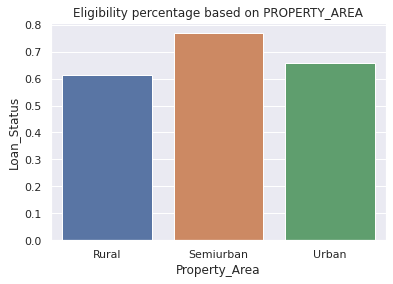

In [17]:
#plotting BAR CHARTS for Categorical data
for col in cat_cols:
    sns.barplot( data = df.groupby(col)['Loan_Status'].mean().reset_index() ,x=col ,y="Loan_Status")
    plt.title('Eligibility percentage based on '+ col.upper())
    plt.show()
    print('\n\n') 

**From this we can conclude that:**
*   Male has slightly higher chance for being eligible for loan
*   Married people have more chances of being approved for the loan
*   People with 2 or no dependents have more chances than people with more than 3 dependednts.
*   Graduate individual has more chances of getting an approval
*   Self employes or not, both has similar chance of getting an approval
*   People living in semiurban area are more likely to get a loan approved
*   People with credit history with 1.0 is more likely to get approved

In [18]:
for i in num_cols:
    if i != 'Loan_Status':
        print(df.groupby('Loan_Status')[i].median().reset_index())
        print('\n\n')

   Loan_Status  ApplicantIncome
0            0           3833.5
1            1           3812.5



   Loan_Status  CoapplicantIncome
0            0              268.0
1            1             1239.5



   Loan_Status  LoanAmount
0            0       129.0
1            1       126.0



   Loan_Status  Loan_Amount_Term
0            0             360.0
1            1             360.0





**We can conclude:**
* The median Applicant income of eligible cadidates is  3812.5
* The median Coapplicant income of eligible cadidates is 1239.5
* The median Loan amount of eligible cadidates is 126.0
* The median Loan amount term of eligible cadidates is 360.0


**Dealing with missing values**

In [19]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Filling numerical data with median and categorical with mode**

In [20]:
for col in num_cols:
        df[col].fillna(df[col].median(), inplace = True)
df.isna().sum()       

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
for col in cat_cols:
    print(col, df[col].mode())

Gender 0    Male
dtype: object
Married 0    Yes
dtype: object
Dependents 0    0
dtype: object
Education 0    Graduate
dtype: object
Self_Employed 0    No
dtype: object
Credit_History 0    one
dtype: object
Property_Area 0    Semiurban
dtype: object


In [22]:
test_df.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [23]:
df.Gender.fillna('Male', inplace = True)
df.Married.fillna('Yes', inplace = True)
df.Dependents.fillna('0', inplace = True)
df.Self_Employed.fillna('No', inplace = True)


test_df.Gender.fillna('Male', inplace = True)
test_df.Dependents.fillna('0', inplace = True)
test_df.Self_Employed.fillna('No', inplace = True)
test_df.LoanAmount.fillna(test_df.LoanAmount.median(), inplace = True)
test_df.Loan_Amount_Term.fillna(test_df.Loan_Amount_Term.median(), inplace = True)


**Filling credit history with 'na'**

In [24]:
df.Credit_History.fillna('na', inplace = True)

test_df.Credit_History.fillna('na', inplace = True)

In [25]:
df.shape

(614, 12)

In [26]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Balancing dataset

In [27]:
loan_1 = df.loc[df.Loan_Status == 1].sample(192, random_state = 0)
loan_0 = df.loc[df.Loan_Status == 0]
data = pd.concat([loan_1, loan_0], axis = 0)

In [28]:
balanced_data = data.reset_index(drop = True)

In [29]:
X = balanced_data.drop('Loan_Status', axis = 1)
y = balanced_data['Loan_Status']

x_test = test_df

**Scaling data**

In [30]:
num_cols = X.select_dtypes(['int64', 'float64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X[num_cols])

scaled_test = scaler.fit_transform(x_test[num_cols])

**Encoding categorical columns**

In [31]:
cat_cols = X.select_dtypes('object').columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse = False)
encoded_data = encoder.fit_transform(X[cat_cols])

encoded_test = encoder.fit_transform(test_df[cat_cols])

In [32]:
scaled_X = pd.DataFrame(scaled_data, columns = num_cols)
encoded_X = pd.DataFrame(encoded_data, columns = encoder.get_feature_names())
X_preprocessed = pd.concat([scaled_X, encoded_X], axis = 1)


scaled_X_test = pd.DataFrame(scaled_test, columns = num_cols)
encoded_X_test = pd.DataFrame(encoded_test, columns = encoder.get_feature_names())
X_test_preprocessed = pd.concat([scaled_X_test,encoded_X_test ], axis = 1)

In [33]:
X_preprocessed

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,x0_Female,x0_Male,x1_No,x1_Yes,x2_0,x2_1,...,x3_Graduate,x3_Not Graduate,x4_No,x4_Yes,x5_na,x5_one,x5_zero,x6_Rural,x6_Semiurban,x6_Urban
0,-0.356616,-0.071917,-0.598759,0.268285,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.422439,-0.001589,-0.459770,0.268285,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.260236,-0.071917,-0.031218,0.268285,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.437641,0.844678,0.339420,0.268285,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.276842,-0.497677,-0.309197,0.268285,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.152644,-0.205861,0.466828,0.268285,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
380,-0.363608,-0.497677,-0.679836,0.268285,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
381,-0.754446,11.661432,2.354769,-2.447570,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
382,-0.452843,0.611225,-0.216538,-2.447570,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


**Splitting data into training and validation data**

In [34]:
x_train, x_valid, y_train, y_valid = tts(X_preprocessed,y , test_size = 0.1, random_state = 0, stratify = y)

# Model Selection

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

model_rf = RandomForestClassifier(random_state = 0)
model_rf.fit(x_train,y_train)

model_lr = LogisticRegression(max_iter = 250)
model_lr.fit(x_train,y_train)

model_sv = svm.SVC(kernel='linear', random_state = 0)
model_sv.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

**Model Evaluation**

In [36]:
preds_lr = model_lr.predict(x_valid)
preds_rf = model_rf.predict(x_valid)
preds_sv = model_sv.predict(x_valid)

In [37]:
print('Accuracy score for Logistic regression: {0}\nF1 score for Logistic regression: {1} '.format(accuracy_score(preds_lr, y_valid),f1_score(preds_lr, y_valid)))

Accuracy score for Logistic regression: 0.5897435897435898
F1 score for Logistic regression: 0.6190476190476191 


In [38]:
print('Accuracy score for Random_Forest: {0}\nF1 score for Random Forest: {1} '.format(accuracy_score(preds_rf, y_valid),f1_score(preds_rf, y_valid)))

Accuracy score for Random_Forest: 0.6153846153846154
F1 score for Random Forest: 0.6153846153846154 


In [39]:
print('Accuracy score for SVM: {0}\nF1 score for SVM: {1} '.format(accuracy_score(preds_sv, y_valid),f1_score(preds_sv, y_valid)))

Accuracy score for SVM: 0.6410256410256411
F1 score for SVM: 0.72 


In [40]:
print('LOGISTICS REGRESSION\n')
print(classification_report(preds_lr, y_valid))

LOGISTICS REGRESSION

              precision    recall  f1-score   support

           0       0.50      0.62      0.56        16
           1       0.68      0.57      0.62        23

    accuracy                           0.59        39
   macro avg       0.59      0.60      0.59        39
weighted avg       0.61      0.59      0.59        39



In [41]:
print('RANDOM FOREST\n')
print(classification_report(preds_rf, y_valid))

RANDOM FOREST

              precision    recall  f1-score   support

           0       0.60      0.63      0.62        19
           1       0.63      0.60      0.62        20

    accuracy                           0.62        39
   macro avg       0.62      0.62      0.62        39
weighted avg       0.62      0.62      0.62        39



In [42]:
print('SUPPORT VECTOR\n')
print(classification_report(preds_sv, y_valid))

SUPPORT VECTOR

              precision    recall  f1-score   support

           0       0.35      0.88      0.50         8
           1       0.95      0.58      0.72        31

    accuracy                           0.64        39
   macro avg       0.65      0.73      0.61        39
weighted avg       0.82      0.64      0.67        39



**Determinig optimal max_depth for RANDOM FOREST**

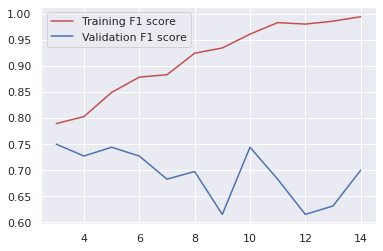

In [43]:
f1scores_train = []
f1scores_valid = []

depth = range (3, 15)

for i in depth:
    model = RandomForestClassifier(max_depth = i, n_estimators = 25, random_state = 0)
    model.fit(x_train, y_train)
    
    train_preds = model.predict(x_train)
    valid_preds = model.predict(x_valid)
    
   # print(classification_report(valid_preds, y_valid))
    
    f1scores_train.append(f1_score(train_preds, y_train))
    f1scores_valid.append(f1_score(valid_preds, y_valid))
    
plt.plot(depth, f1scores_train, color = 'r')
plt.plot(depth ,f1scores_valid, color = 'b')
plt.legend(['Training F1 score', 'Validation F1 score'])

**Final Model**

In [44]:
final_model = RandomForestClassifier(max_depth = 5, n_estimators = 25, random_state = 0)
#final_model = LogisticRegression()
final_model.fit(x_train, y_train)
preds = final_model.predict(x_valid)

There is more precision with max_depth = 5

In [45]:
print( 'Accuracy score for final model: {0}\nF1 score for final model: {1} '.format(accuracy_score(preds, y_valid),f1_score(preds, y_valid)))

Accuracy score for final model: 0.717948717948718
F1 score for final model: 0.744186046511628 


In [46]:
print(classification_report(preds, y_valid))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69        15
           1       0.84      0.67      0.74        24

    accuracy                           0.72        39
   macro avg       0.72      0.73      0.71        39
weighted avg       0.75      0.72      0.72        39



In [47]:
#Predictions on test_data
model_lr.predict(X_test_preprocessed)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

# Deploying model

In [48]:
import pickle 
#save the model to disk
filename = 'model.pkl'
pickle.dump(final_model, open(filename, 'wb')) # wb means write as binary

**To read model from file**

In [49]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb')) # rb means read as binary
preds = loaded_model.predict(x_valid)

In [50]:
print( 'Accuracy score : {0}\nF1 score : {1} '.format(accuracy_score(preds, y_valid),f1_score(preds, y_valid)))

Accuracy score : 0.717948717948718
F1 score : 0.744186046511628 
